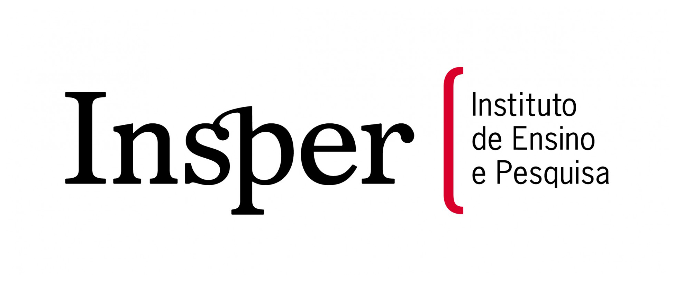

# Computação para Ciências dos Dados

<sub><a href="https://www.insper.edu.br/pos-graduacao/programas-avancados/programa-avancado-em-data-science-e-decisao/">PÓS-GRADUAÇÃO EM DATA SCIENCE E DECISÃO</a></sub>

## Dica do Dia: 008

O objetivo desta dica do dia e explorar um pouco mais sobre GEO processamento, consumindo APIs de geo localização e visualização de mapas

> Todos os dias no período de contingência pelo Coronavirus (COVID-19) vamos enviar uma breve dica sobre Python para ciências dos dados em um jupyter notebook, conteúdo adicional ao curso que pode ser utilizado nos projetos

Vamos utilizar 3 recursos muito interessantes relacionados a GEO processamento, sempre seguindo nosso processo:
- Instalar a biblioteca externa com o PIP
- Importar a biblioteca
- Obter a chave (KEY) quando necessário
- Explorar algumas funcionalidades/objetos:

### what3words

What3words é um serviço de GEO localização que dividiu o mundo em pequenos quadrados de três metros cada, este espaços são nomeados com 3 palavras. A estátua do Borbagato ficam em [///afirmou.brilhei.casaria](https://what3words.com/afirmou.brilhei.casaria)

1. Acessar o site e assistir o vídeo de introdução: https://what3words.com/
2. Criar uma conta developer, assistir o vídeo para developers e criar uma chave (KEY): https://developer.what3words.com/public-api 

In [1]:
!pip install what3words

Consumir a WEB API via biblioteca Python

In [7]:
import what3words

In [22]:
KEY="ZAPPJWS1" #Chave do professor, obtenha a sua no site...

In [4]:
geocoder = what3words.Geocoder(KEY)

In [13]:
res = geocoder.convert_to_3wa(what3words.Coordinates(-23.550771, -46.634119)) #Praça da Sé
res

{'country': 'BR',
 'square': {'southwest': {'lng': -46.634145, 'lat': -23.550776},
  'northeast': {'lng': -46.634116, 'lat': -23.550749}},
 'nearestPlace': 'São Paulo',
 'coordinates': {'lng': -46.63413, 'lat': -23.550763},
 'words': 'saints.binder.noted',
 'language': 'en',
 'map': 'https://w3w.co/saints.binder.noted'}

In [12]:
res = geocoder.convert_to_coordinates('viram.curta.tarefa') #Insper
res

{'country': 'BR',
 'square': {'southwest': {'lng': -46.676495, 'lat': -23.598803},
  'northeast': {'lng': -46.676465, 'lat': -23.598776}},
 'nearestPlace': 'Paraíso, São Paulo',
 'coordinates': {'lng': -46.67648, 'lat': -23.59879},
 'words': 'viram.curta.tarefa',
 'language': 'pt',
 'map': 'https://w3w.co/viram.curta.tarefa'}

Consumir a API via WEB API direto (HTTP - requests)

In [15]:
import requests

In [19]:
requests.get("https://api.what3words.com/v3/convert-to-coordinates?words=filled.count.soap&key=" + KEY).json()

{'country': 'GB',
 'square': {'southwest': {'lng': -0.195543, 'lat': 51.520833},
  'northeast': {'lng': -0.195499, 'lat': 51.52086}},
 'nearestPlace': 'Bayswater, London',
 'coordinates': {'lng': -0.195521, 'lat': 51.520847},
 'words': 'filled.count.soap',
 'language': 'en',
 'map': 'https://w3w.co/filled.count.soap'}

In [23]:
requests.get("https://api.what3words.com/v3/convert-to-3wa?coordinates=-22.952004%2C-43.210450&key=" + KEY).json()

{'country': 'BR',
 'square': {'southwest': {'lng': -43.210471, 'lat': -22.952027},
  'northeast': {'lng': -43.210442, 'lat': -22.952}},
 'nearestPlace': 'Rio de Janeiro',
 'coordinates': {'lng': -43.210456, 'lat': -22.952013},
 'words': 'wide.dressy.locker',
 'language': 'en',
 'map': 'https://w3w.co/wide.dressy.locker'}

In [27]:
def getGeoLocation(words):
    return requests.get("https://api.what3words.com/v3/convert-to-coordinates?words=" + words + "&key=" + KEY).json()

### Folium

Poderoso serviço de mapas: https://python-visualization.github.io/folium/quickstart.html

In [25]:
!pip install folium

    100% |████████████████████████████████| 92kB 193kB/s ta 0:00:01


In [26]:
import folium

Você já tentou encontrar alguém na USP com base no endereço??

In [36]:
local = getGeoLocation("hinos.pregão.limpo") #POLI Elétrica

In [37]:
type(local)

dict

In [38]:
local

{'country': 'BR',
 'square': {'southwest': {'lng': -46.730622, 'lat': -23.557056},
  'northeast': {'lng': -46.730593, 'lat': -23.557029}},
 'nearestPlace': 'Osasco, São Paulo',
 'coordinates': {'lng': -46.730608, 'lat': -23.557042},
 'words': 'hinos.pregão.limpo',
 'language': 'pt',
 'map': 'https://w3w.co/hinos.preg%C3%A3o.limpo'}

In [39]:
local['coordinates']

{'lng': -46.730608, 'lat': -23.557042}

In [44]:
folium.Map(location=[local['coordinates']['lat'], 
                     local['coordinates']['lng']], 
                     zoom_start=100)

Como obter a geolizalização com base em um texto de referência, como endereço?

### Geopy

O serviço GeoPy faz o melhor possível para encontar um endereço com base em um texto de referência: https://github.com/geopy/geopy

In [45]:
!pip install geopy

    100% |████████████████████████████████| 112kB 820kB/s ta 0:00:01


In [50]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Insper-Data-Sciece")

location = geolocator.geocode("Rua Quatá, 300")

In [51]:
location.address

'Insper, 300, Rua Quatá, Vila Olímpia, Itaim Bibi, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Intermediária de São Paulo, São Paulo, Região Sudeste, 04546-042, Brasil'

In [52]:
print(location.latitude, location.longitude)

-23.5987249 -46.67643049021903


In [53]:
location.raw #JSON - dict

{'place_id': 115453434,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 124962732,
 'boundingbox': ['-23.5989711', '-23.5982227', '-46.6772417', '-46.6761522'],
 'lat': '-23.5987249',
 'lon': '-46.67643049021903',
 'display_name': 'Insper, 300, Rua Quatá, Vila Olímpia, Itaim Bibi, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Intermediária de São Paulo, São Paulo, Região Sudeste, 04546-042, Brasil',
 'class': 'amenity',
 'type': 'university',
 'importance': 0.7272292779261076,
 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/education_university.p.20.png'}

In [54]:
geolocator.geocode("IBM Brasil, São Paulo").raw

{'place_id': 91068649,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 27030323,
 'boundingbox': ['-23.5802994', '-23.5796875', '-46.6495605', '-46.6489428'],
 'lat': '-23.5799788',
 'lon': '-46.64926899968789',
 'display_name': 'IBM, 1157, Rua Tutóia, Paraíso, Vila Mariana, São Paulo, Região Imediata de São Paulo, Região Metropolitana de São Paulo, Região Intermediária de São Paulo, São Paulo, Região Sudeste, 04007-900, Brasil',
 'class': 'building',
 'type': 'yes',
 'importance': 0.42100000000000004}

In [55]:
geolocator.geocode("Palácio da Alvorada").raw

{'place_id': 89816899,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 18140049,
 'boundingbox': ['-15.7931752', '-15.7921605', '-47.8222825', '-47.8219799'],
 'lat': '-15.792846749999999',
 'lon': '-47.82213184388242',
 'display_name': 'Palácio da Alvorada, EHT, Plano Piloto, Região Integrada de Desenvolvimento do Distrito Federal e Entorno, Distrito Federal, Região Centro-Oeste, 70200-003, Brasil',
 'class': 'historic',
 'type': 'castle',
 'importance': 0.6941553169065635,
 'icon': 'https://nominatim.openstreetmap.org/images/mapicons/tourist_castle.p.20.png'}

In [59]:
bsb=geolocator.geocode("Palácio da Alvorada").raw
folium.Map(location=[bsb['lat'], 
                     bsb['lon']], 
                     zoom_start=80)

In [64]:
ZL=geolocator.geocode("Tatuapé").raw
folium.Map(location=[ZL['lat'], 
                     ZL['lon']], 
           zoom_start=80)

Se você cair no mar é porque inverteu os valores de latitudo e longitude!!

**Dica**: Você pode utilizar geolocalização em seus projetos de Data Science, tanto obter a geolocalização de endereços, como plotar e criar visualizações com base na latitude, longitude e altitude. Você pode obter a geolocalização de uma mensagem do Twitter usando o geopy.

Para saber mais:
    
- https://what3words.com/
- https://en.wikipedia.org/wiki/What3words
- https://github.com/geopy/geopy
- https://python-visualization.github.io/folium/index.html
- https://en.wikipedia.org/wiki/Geographic_information_system
- https://en.wikipedia.org/wiki/Geographic_coordinate_system
- https://www.openstreetmap.org